In [5]:
#!pip install -q transformers

from transformers import pipeline

# TODO: input way to grab lyrics

In [306]:
lyrics = "First of March, it's clear to me There's something that's uncomforting Your body has a way with me But I'm exactly where I wanna be But I'm a long way from home I know your voice, I know your face This is something I cannot replace Give me hope and give me doubt Well I loved you then but I don't love you now I'm a long way from home 'Cause we're a long way from home No listen now, don't walk away I've got nothing more to say Can you see it in my dying face You're acting like I care Now is there anything that I can do If there was would we be singing 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you"

In [20]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier(lyrics, )

max_score = 0
max_label = ""
for i in prediction[0]:
  if i['score'] > max_score:
    max_score = i['score']
    max_label = i['label']

print(max_label, max_score)

# output second most likely emotion
second_max_score = 0
second_max_label = ""
for i in prediction[0]:
  if i['score'] > second_max_score and i['score'] < max_score:
    second_max_score = i['score']
    second_max_label = i['label']

print(second_max_label, second_max_score)


sadness 0.9482561945915222
love 0.03348318859934807


Gives either: sadness, joy, love, anger, fear, surprise

In [303]:
# Colour channel ranges - can adjust these
blue_ranges = [(0, 50), (0, 150), (150, 255)]
purple_ranges = [(100, 255), (0, 50), (100, 255)]
red_ranges = [(150, 255), (0, 50), (0, 50)]
orange_ranges = [(200, 255), (50, 150), (0, 50)]
yellow_ranges = [(200, 255), (200, 255), (0, 50)]
green_ranges = [(0, 50), (150, 255), (0, 50)]

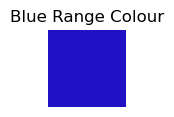

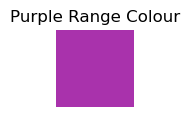

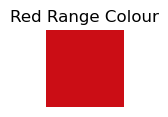

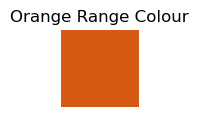

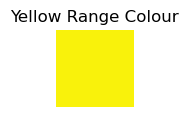

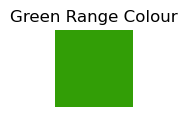

In [292]:
import random

# This is just to create a random colour for testing
# not part of the actual code.
def generate_random_colour(channel_ranges):
    random_values = []

    for channel_range in channel_ranges:
        random_channel_value = random.randint(channel_range[0], channel_range[1])
        random_values.append(random_channel_value)

    return tuple(random_values)

# Example
random_blue_colour = generate_random_colour(blue_ranges)
random_purple_colour = generate_random_colour(purple_ranges)
random_red_colour = generate_random_colour(red_ranges)
random_orange_colour = generate_random_colour(orange_ranges)
random_yellow_colour = generate_random_colour(yellow_ranges)
random_green_colour = generate_random_colour(green_ranges)

import matplotlib.pyplot as plt

def display_colour(colour, colour_name):
    plt.figure(figsize=(1, 1))  # Set the figure size to be smaller (1 inch by 1 inch)
    plt.title(colour_name + ' Range Colour')
    plt.imshow([[colour]], extent=[0, 1, 0, 1], aspect='auto')
    plt.axis('off')
    plt.show()


display_colour(random_blue_colour, 'Blue')
display_colour(random_purple_colour, 'Purple')
display_colour(random_red_colour, 'Red')
display_colour(random_orange_colour, 'Orange')
display_colour(random_yellow_colour, 'Yellow')
display_colour(random_green_colour, 'Green')



In [288]:
#based on the main emotion and secondary emotion provide the two ranges
# Set baseline colourset, brightness range and ripple characteristics (i.e. how quick or slow)

match max_label:
    case "sadness":
        base_colour = blue_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "joy":
        base_colour = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "anger":
        base_colour = red_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "fear":
        base_colour = purple_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "love":
        base_colour = orange_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "surprise":
        base_colour = green_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case _:
        base_colour = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    
match second_max_label:
    case "sadness": # blue + purple
        secondary_colour = blue_ranges
    case "joy":
        secondary_colour = yellow_ranges
    case "anger": # red + orange
        secondary_colour = red_ranges
    case "fear":
        secondary_colour = green_ranges
    case "love": # yellow + green
        secondary_colour = orange_ranges
    case "surprise": #orange + yellow
        secondary_colour = green_ranges
    case _:
        secondary_colour = yellow_ranges

print(base_colour, secondary_colour, brightness_range, ripple_speed)

[(0, 50), (0, 150), (150, 255)] [(200, 255), (50, 150), (0, 50)] (0.5, 1.0) 0.5
